## Final Project Solutions
Author: Laura Bissoltan

### Problem 1

#1.1
$$\ddot{x} = -\frac{\pi R^2\rho C}{2m}\dot{x}\sqrt{\dot{x}^{2}+\dot{y}^{2}}$$
$$\ddot{y} = -g -\frac{\pi R^2\rho C}{2m}\dot{y}\sqrt{\dot{x}^{2}+\dot{y}^{2}}$$


where $R$ is the sphere’s radius, $\rho$ is the density of air, $\nu$ is the velocity, $g$ is gravitaional constant, $C$ is the coefficient of drag, $\dot{x}$ and $\ddot{x}$ are the first and second derivatives of $x$ w.r.t time

#1.2
$$\frac{dx}{dt}=\frac{dy_1}{dt}=y_2$$
$$\frac{dy}{dt}=\frac{dy_3}{dt}=y_4$$
$$\frac{dy_2}{dt} = -\frac{\pi R^2\rho C}{2m}{y_2}\sqrt{{y_2}^{2}+{y_4}^{2}}$$
$$\frac{dy_4}{dt} = -g -\frac{\pi R^2\rho C}{2m}{y_2}\sqrt{{y_2}^{2}+{y_4}^{2}}$$


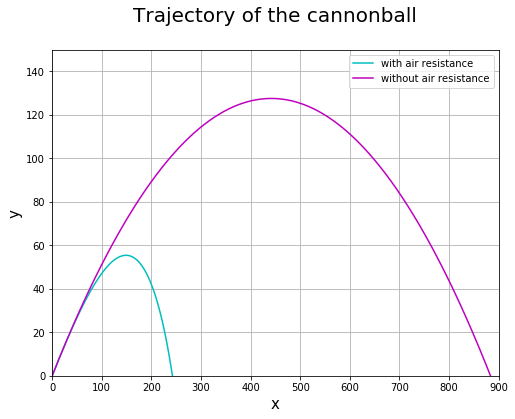


 Step size h=0.01.


In [123]:
#source code for RK4 is from lecture 23 (Lec23 part-II)

import numpy as np
from numpy import pi,sin,cos,sqrt
from matplotlib import pyplot as plt

m = 1 #kg
R = 0.08 #m
ang = pi/6 #radians
v0 = 100 #m/s
p = 1.22 #kg/m^3
g = 9.8 #m/s^2
C = 0.47 #drag coef.
C1 = 0

def f1(yv,t):
    return yv[1] 

def f2(yv,t):
    return ((-pi*R**2*p*C)/(2*m))*yv[1]*sqrt((yv[1])**2+(yv[3])**2)

def f3(yv,t):
    return yv[3] 

def f4(yv,t):
    return -g-((pi*R**2*p*C)/(2*m))*yv[3]*sqrt((yv[1])**2+(yv[3])**2)

def f5(yv,t):
    return ((-pi*R**2*p*C1)/(2*m))*yv[1]*sqrt((yv[1])**2+(yv[3])**2)

def f6(yv,t):
    return -g-((pi*R**2*p*C1)/(2*m))*yv[3]*sqrt((yv[1])**2+(yv[3])**2)


fv = [f1,f2,f3,f4]

def ysfromRK4(fv,yv0,t):                             #ysfromRK4([f1,f2,f3,f4],[0,v0cos30,0,v0sin30],t)
    h = t[1]-t[0]; nt = len(t);ny = len(y0)          #t = np.linspace(0,10.52,1000)
    Ys = np.zeros((ny,nt)) 
    
    Ys[:,0] = yv0
    for i in range(nt-1):
        k1 = K1(fv,Ys[:,i],t[i])
        k2 = K2(k1,fv,Ys[:,i],t[i],h)
        k3 = K3(k2,fv,Ys[:,i],t[i],h)
        k4 = K4(k3,fv,Ys[:,i],t[i],h)
        Ys[:,i+1] = Ys[:,i]+1/6*(k1+2*k2+2*k3+k4)*h
    return Ys

def K1(fv,yi,ti):
    N = len(fv)
    k1 = np.zeros(N)
    for j in range(N):
        k1[j] = fv[j](yi,ti)
    return k1

def K2(k1,fv,yi,ti,h):
    N = len(fv); k2 = np.zeros(N)
    for j in range(N):
        k2[j] = fv[j](yi+0.5*k1*h,ti+0.5*h)
    return k2

def K3(k2,fv,yi,ti,h):
    N = len(fv); k3 = np.zeros(N)
    for j in range(N):
        k3[j] = fv[j](yi+k2*0.5*h,ti+0.5*h)
    return k3

def K4(k3,fv,yi,ti,h):
    N = len(fv); k4 = np.zeros(N)
    for j in range(N):
        k4[j] = fv[j](yi+k3*h,ti+h)
    return k4

fv = [f1,f2,f3,f4]

t = np.linspace(0,10.52,1000)
y0 = [0,v0*cos(ang),0,v0*sin(ang)]
Ys = ysfromRK4(fv,y0,t)

fv1 = [f1,f5,f3,f6]
Ys1 = ysfromRK4(fv1,y0,t)  


plt.figure(figsize=(8,6)) 
plt.plot(Ys[0,:],Ys[2,:],'c',Ys1[0,:],Ys1[2,:],'m')
plt.title("Trajectory of the cannonball\n",size=20)              #def f1(yv,t):  return yv[1] 
plt.legend(["with air resistance","without air resistance"])    #def f3(yv,t): return yv[3] 
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.ylim(0,150)
plt.xlim(0,900)
plt.grid()
plt.show()
print(f'\n Step size h={t[1]-t[0]:.2f}.')




In [124]:
#1.4

def distance(x_elt,y_elt,n):
    for i in range(1,n):
        if y_elt[n-i]>0: break
    return x_elt[n-i]

C=distance(Ys[0,:],Ys[2,:],1000)
D=distance(Ys1[0,:],Ys1[2,:],1000)

print(f'Total distance with air resistance: {C:.2f} meters.')
print(f'Total distance ignoring air resistance: {D:.2f} meters.')


Total distance with air resistance: 242.33 meters.
Total distance ignoring air resistance: 882.79 meters.


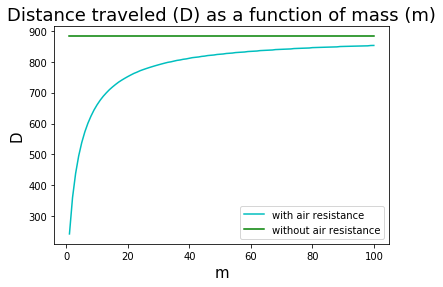

In [125]:
#1.5
import numpy as np
from numpy import pi,sin,cos,sqrt
from matplotlib import pyplot as plt

#m = 1 #kg
R = 0.08 #m
ang = pi/6 #radians
v0 = 100 #m/s
p = 1.22 #kg/m^3
g = 9.8 #m/s^2
C = 0.47 #drag coef.
C1 = 0

def f1(yv,t,m):
    return yv[1] 

def f2(yv,t,m):
    return ((-pi*R**2*p*C)/(2*m))*yv[1]*sqrt((yv[1])**2+(yv[3])**2)

def f3(yv,t,m):
    return yv[3] 

def f4(yv,t,m):
    return -g-((pi*R**2*p*C)/(2*m))*yv[3]*sqrt((yv[1])**2+(yv[3])**2)

def f5(yv,t,m):
    return ((-pi*R**2*p*C1)/(2*m))*yv[1]*sqrt((yv[1])**2+(yv[3])**2)

def f6(yv,t,m):
    return -g-((pi*R**2*p*C1)/(2*m))*yv[3]*sqrt((yv[1])**2+(yv[3])**2)

t = np.linspace(0,10.52,1000)
m = np.linspace(1,100,100)

fv = [f1,f2,f3,f4]

dist = []
dist1 = []

for i in range(len(m)):
    def ysfromRK4(fv,yv0,t):
        h = t[1]-t[0]; nt = len(t);ny = len(y0)
        Ys = np.zeros((ny,nt)) 
        Ys[:,0] = yv0
        for i in range(nt-1):
            k1 = K1(fv,Ys[:,i],t[i])
            k2 = K2(k1,fv,Ys[:,i],t[i],h)
            k3 = K3(k2,fv,Ys[:,i],t[i],h)
            k4 = K4(k3,fv,Ys[:,i],t[i],h)
            Ys[:,i+1] = Ys[:,i]+1/6*(k1+2*k2+2*k3+k4)*h
        return Ys
    def K1(fv,yi,ti):
        N = len(fv)
        k1 = np.zeros(N)
        for j in range(N):
            k1[j] = fv[j](yi,ti,m[i])
        return k1
    
    def K2(k1,fv,yi,ti,h):
        N = len(fv); k2 = np.zeros(N)
        for j in range(N):
            k2[j] = fv[j](yi+0.5*k1*h,ti+0.5*h,m[i])
        return k2
    
    def K3(k2,fv,yi,ti,h):
        N = len(fv); k3 = np.zeros(N)
        for j in range(N):
            k3[j] = fv[j](yi+k2*0.5*h,ti+0.5*h,m[i])
        return k3
    
    def K4(k3,fv,yi,ti,h):
        N = len(fv); k4 = np.zeros(N)
        for j in range(N):
            k4[j] = fv[j](yi+k3*h,ti+h,m[i])
        return k4
    
    y0 = [0,v0*cos(ang),0,v0*sin(ang)]
    
    fv=[f1,f2,f3,f4]
    Ys=ysfromRK4(fv,y0,t)
    A=Ys[0,:]
    B=Ys[2,:]    
    dist.append(distance(A,B,1000))
    
    fv1 = [f1,f5,f3,f6]
    Ys1=ysfromRK4(fv1,y0,t)
    A1=Ys1[0,:]
    B1=Ys1[2,:]
    dist1.append(distance(A1,B1,1000))
    
plt.plot(m,dist,'c',m,dist1,'green')
plt.title("Distance traveled (D) as a function of mass (m)",size=18)
plt.legend(["with air resistance","without air resistance"])
plt.xlabel("m",size=15)
plt.ylabel("D",size=15)
plt.show()





#1.6 <br /> 
As can be seen from the plot above distance was constantly around 900 meters when air resistance is ignored, so distance does not depend on mass when there is no air resistance. When air resistance is involved the distance has a logarithmic growth and as the sphere became heavier the air resistance has less effect on it than when the sphere is lighter.

## Problem 2

In [126]:
#1.1

import numpy as np

datafile = 'data.txt'
Data = np.loadtxt(datafile, comments='#')

X=Data[:,0] 
Y=Data[:,1] 

def xsum(m):
    c=[]
    for i in range(len(X)): 
        c.append(X[i]**m)
    return sum(c)

def xysum(m1):
    d=[]
    for i in range(len(X)):
        d.append(X[i]**m1*Y[i])
    return sum(d)

a=np.array([[len(X),sum(X)],\
            [sum(X),xsum(2)]])

b=np.array([sum(Y),xysum(1)])


a0,a1=np.linalg.solve(a,b)
print("a0 =",a0,"\n""a1 =",a1)

a0 = -2758.943681207632 
a1 = 1.5656737982772435


In [127]:
#1.2

c=np.array([[len(X),sum(X),xsum(2)],\
            [sum(X),xsum(2),xsum(3)],\
            [xsum(2),xsum(3),xsum(4)]])

d=np.array([sum(Y),xysum(1),xysum(2)])

a00,a11,a22=np.linalg.solve(c,d)
print("a0 =",a00,"\n""a1 =",a11,"\n""a2 =",a22)

a0 = 47068.21392554498 
a1 = -48.5534483838502 
a2 = 0.012602243445337762


In [128]:
#1.3

S_r1=[]
for i in range(len(X)):
    S_r1.append((Y[i]-a0-a1*X[i])**2)

S_r2=[]
for i in range(len(X)):
    S_r2.append((Y[i]-a00-a11*X[i]-a22*X[i]**2)**2)

print("S_r when degree n=1",sum(S_r1),"\n""S_r when degree n=2",sum(S_r2))

S_r when degree n=1 713.3569985292215 
S_r when degree n=2 28.22227650419054


Second order polynomial fits best to the data. Because it calculates vertical distance between data and fit, and $S_r$ for second order is much more smaller than first order. 

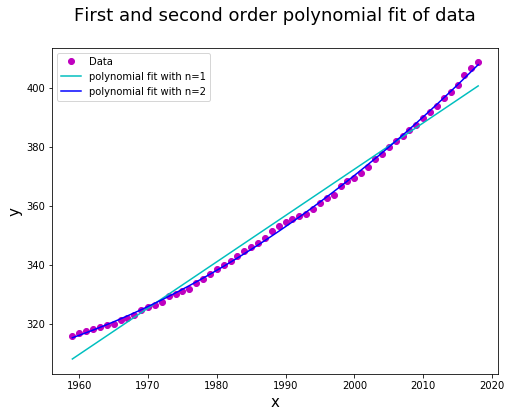

In [129]:
#1.4

from matplotlib import pyplot as plt

def f(x):
    return a0+a1*x
def g(x):
    return a00+a11*x+a22*x**2

plt.figure(figsize=(8,6))
plt.title("First and second order polynomial fit of data\n", size=18)
#plt.scatter(X,Y)
x=np.linspace(1959,2018,100)
plt.plot(X,Y,'mo',x,f(x),'c',x,g(x),'b')
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.legend(["Data","polynomial fit with n=1","polynomial fit with n=2"])
plt.show()

### Problem 3

In [145]:
r=0.2
s=1
r=np.arange(0,1,0.2)
for i in range(5):
    A=np.array([[1,0,0,0],\
           [r[i],-2*r[i]-0.04,0.04+r[i],0,0,0,0],\
           [0,r[i],-2*r[i]-0.04,0.04+r[i],0,0,0],\
           [0,0,r[i],-2*r[i]-0.04,0.04+r[i],0,0],\
           [0,0,0,r[i],-2*r[i]-0.04,0.04+r[i],0],\
            [0,0,0,0,r[i],-2*r[i]-0.04,0.04+r[i]],\
            [0,0,0,0,0,0,1]])
    b=np.array([0,-0.04*r[i]*s,-0.04*r[i]*s,-0.04*r[i]*s,-0.04*r[i]*s,-0.04*r[i]*s,-0.04*r[i]*s])
    print(np.linalg.solve(A,b))



[ 0. -0. -0. -0. -0. -0. -0.]
[ 0.          0.09870104  0.14761857  0.15504985  0.12790925  0.07195875
 -0.008     ]
[ 0.          0.09762181  0.15000528  0.16126298  0.13513361  0.07501601
 -0.016     ]
[ 0.          0.0961189   0.14873036  0.16055361  0.1341379   0.07187318
 -0.024     ]
[ 0.          0.09464694  0.14669165  0.15816279  0.13099246  0.06702071
 -0.032     ]
